In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage

In [2]:
thing = pickle.load(open('mario_tracks.pkl'))

track4
track3
track6
track5
track7
track8
track9
track10
track11
track13
track12
track16
track14
track17
track15
track20
track18
track21
track19
track22
track24
track23
track25
track28
track26
track30
track2


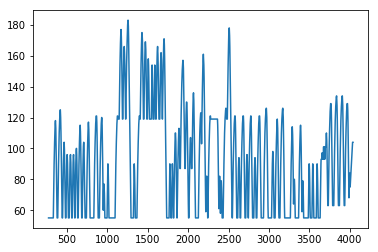

set([(52, 0, 'right'), (180, 1, 'top'), (38, 0, 'internal'), (181, 1, 'top'), (38, 0, 'left'), (52, 0, 'internal'), (38, 0, 'bottom'), (38, 0, 'right'), (52, 0, 'bottom')])


In [3]:
tracks = thing[1]

for track in tracks:
    trackID = track[0]
    print trackID
    if trackID == 'track2':
        trackDict = track[1]
        trackDat = []
        for t in sorted(trackDict):
            trackDat.append([t] + list(trackDict[t][1]))
        trackDat = np.array(trackDat)
        plt.plot(trackDat[:,0],256-trackDat[:,2])
        plt.show()
        break
exemplarTrack = trackDat
# <time, center_x, center_y, left,right,top,bottom>


nametables = 'nametables/nametable_{}.png'
attributes = 'nametables/attributes_{}.png'
tile_collisions = {}
for pt in exemplarTrack:
    time = pt[0]
    nametable = scipy.ndimage.imread(nametables.format(time))[:,:,0]
    attribute = scipy.ndimage.imread(attributes.format(time))[:,:,0]
    left,right,bottom,top = pt[-4:]
    
    tile_collision = set()
    for nt,attr in zip(nametable[(bottom+1):(top-1),(left+1):(right-1)].ravel(),
                       attribute[(bottom+1):(top-1),(left+1):(right-1)].ravel()):
    
        tile_collision.add( (nt,attr,'internal'))
    for nt,attr in zip(nametable[(bottom-1):(bottom+1),(left+1):(right-1)].ravel(),
                       attribute[(bottom-1):(bottom+1),(left+1):(right-1)].ravel()):
        tile_collision.add( (nt,attr,'bottom'))
        
    for nt,attr in zip(nametable[(top-1):(top+1),(left+1):(right-1)].ravel(),
                       attribute[(top-1):(top+1),(left+1):(right-1)].ravel()):
        tile_collision.add( (nt,attr,'top'))
    for nt,attr in zip(nametable[(bottom+1):(top-1),(left+1):(right-1)].ravel(),
                       attribute[(bottom+1):(top-1),(left+1):(right-1)].ravel()):
    
        tile_collision.add( (nt,attr,'internal'))
    for nt,attr in zip(nametable[(bottom+1):(top-1),(left-1):(left+1)].ravel(),
                       attribute[(bottom+1):(top-1),(left-1):(left+1)].ravel()):
    
        tile_collision.add( (nt,attr,'left'))
    for nt,attr in zip(nametable[(bottom+1):(top-1),(right-1):(right+1)].ravel(),
                       attribute[(bottom+1):(top-1),(right-1):(right+1)].ravel()):
    
        tile_collision.add( (nt,attr,'right'))
    tile_collisions[time] = tile_collision
print tile_collisions[270]

948 979
{950: set([])}
{950: set([((5, 6), 'bottom')]), 951: set([])}
{952: set([]), 950: set([((5, 6), 'bottom')]), 951: set([((5, 6), 'bottom')])}
{952: set([((5, 6), 'bottom')]), 953: set([]), 950: set([((5, 6), 'bottom')]), 951: set([((5, 6), 'bottom')])}
{952: set([((5, 6), 'bottom')]), 953: set([((5, 6), 'bottom')]), 954: set([]), 950: set([((5, 6), 'bottom')]), 951: set([((5, 6), 'bottom')])}
{950: set([((5, 6), 'bottom')]), 951: set([((5, 6), 'bottom')]), 952: set([((5, 6), 'bottom')]), 953: set([((5, 6), 'bottom')]), 954: set([((5, 6), 'bottom')]), 955: set([])}
{950: set([((5, 6), 'bottom')]), 951: set([((5, 6), 'bottom')]), 952: set([((5, 6), 'bottom')]), 953: set([((5, 6), 'bottom')]), 954: set([((5, 6), 'bottom')]), 955: set([((5, 6), 'bottom')]), 956: set([])}
{950: set([((5, 6), 'bottom')]), 951: set([((5, 6), 'bottom')]), 952: set([((5, 6), 'bottom')]), 953: set([((5, 6), 'bottom')]), 954: set([((5, 6), 'bottom')]), 955: set([((5, 6), 'bottom')]), 956: set([((5, 6), 'bo

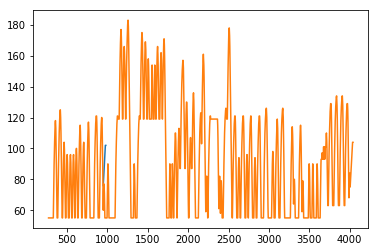

767 980
{946: set([]), 950: set([((5, 6), 'bottom')]), 951: set([((5, 6), 'bottom')]), 952: set([((5, 6), 'bottom')]), 953: set([((5, 6), 'bottom')]), 954: set([((5, 6), 'bottom')]), 955: set([((5, 6), 'bottom')]), 956: set([((5, 6), 'bottom')]), 957: set([((5, 6), 'bottom')]), 958: set([((5, 6), 'bottom')]), 959: set([((5, 6), 'bottom')])}
{946: set([((8, 5, 6, 7), 'right')]), 947: set([]), 950: set([((5, 6), 'bottom')]), 951: set([((5, 6), 'bottom')]), 952: set([((5, 6), 'bottom')]), 953: set([((5, 6), 'bottom')]), 954: set([((5, 6), 'bottom')]), 955: set([((5, 6), 'bottom')]), 956: set([((5, 6), 'bottom')]), 957: set([((5, 6), 'bottom')]), 958: set([((5, 6), 'bottom')]), 959: set([((5, 6), 'bottom')])}
{946: set([((8, 5, 6, 7), 'right')]), 947: set([((8, 5, 6, 7), 'right')]), 948: set([]), 950: set([((5, 6), 'bottom')]), 951: set([((5, 6), 'bottom')]), 952: set([((5, 6), 'bottom')]), 953: set([((5, 6), 'bottom')]), 954: set([((5, 6), 'bottom')]), 955: set([((5, 6), 'bottom')]), 956:

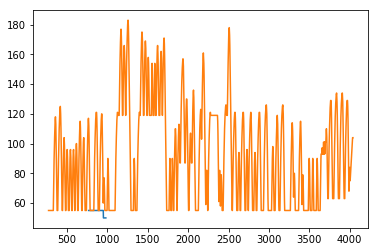

1005 1023
{1005: set([]), 946: set([((8, 5, 6, 7), 'right')]), 947: set([((8, 5, 6, 7), 'right')]), 948: set([((8, 9, 10, 7), 'top')]), 950: set([((5, 6), 'bottom')]), 951: set([((5, 6), 'bottom')]), 952: set([((5, 6), 'bottom')]), 953: set([((5, 6), 'bottom')]), 954: set([((5, 6), 'bottom')]), 955: set([((5, 6), 'bottom')]), 956: set([((5, 6), 'bottom')]), 957: set([((5, 6), 'bottom')]), 958: set([((5, 6), 'bottom')]), 959: set([((5, 6), 'bottom')])}


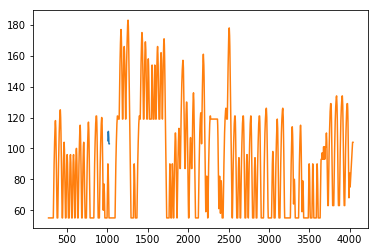

1005 1086


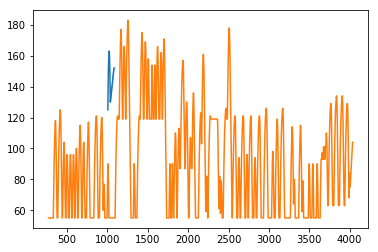

1331 1349
{1331: set([]), 1005: set([((8, 9, 10, 7), 'bottom')]), 946: set([((8, 5, 6, 7), 'right')]), 947: set([((8, 5, 6, 7), 'right')]), 948: set([((8, 9, 10, 7), 'top')]), 950: set([((5, 6), 'bottom')]), 951: set([((5, 6), 'bottom')]), 952: set([((5, 6), 'bottom')]), 953: set([((5, 6), 'bottom')]), 954: set([((5, 6), 'bottom')]), 955: set([((5, 6), 'bottom')]), 956: set([((5, 6), 'bottom')]), 957: set([((5, 6), 'bottom')]), 958: set([((5, 6), 'bottom')]), 959: set([((5, 6), 'bottom')])}


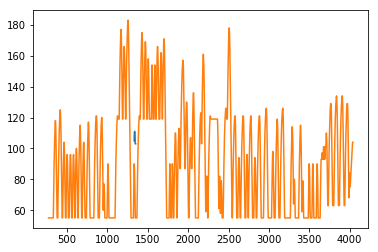

1505 1523
{1505: set([]), 1331: set([((8, 5, 6, 7), 'bottom')]), 1005: set([((8, 9, 10, 7), 'bottom')]), 946: set([((8, 5, 6, 7), 'right')]), 947: set([((8, 5, 6, 7), 'right')]), 948: set([((8, 9, 10, 7), 'top')]), 950: set([((5, 6), 'bottom')]), 951: set([((5, 6), 'bottom')]), 952: set([((5, 6), 'bottom')]), 953: set([((5, 6), 'bottom')]), 954: set([((5, 6), 'bottom')]), 955: set([((5, 6), 'bottom')]), 956: set([((5, 6), 'bottom')]), 957: set([((5, 6), 'bottom')]), 958: set([((5, 6), 'bottom')]), 959: set([((5, 6), 'bottom')])}
{1505: set([((8, 9, 10, 7), 'bottom')]), 1506: set([]), 1331: set([((8, 5, 6, 7), 'bottom')]), 1005: set([((8, 9, 10, 7), 'bottom')]), 946: set([((8, 5, 6, 7), 'right')]), 947: set([((8, 5, 6, 7), 'right')]), 948: set([((8, 9, 10, 7), 'top')]), 950: set([((5, 6), 'bottom')]), 951: set([((5, 6), 'bottom')]), 952: set([((5, 6), 'bottom')]), 953: set([((5, 6), 'bottom')]), 954: set([((5, 6), 'bottom')]), 955: set([((5, 6), 'bottom')]), 956: set([((5, 6), 'bottom')

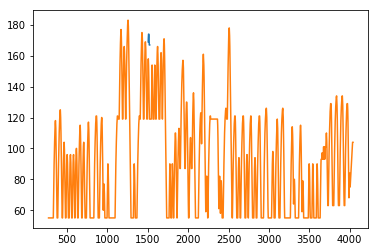

1505 1586


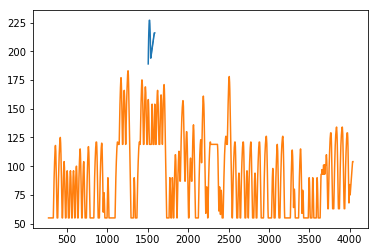

1773 1791
{1505: set([((8, 9, 10, 7), 'bottom')]), 1506: set([((8, 9, 10, 7), 'bottom')]), 1507: set([((8, 9, 10, 7), 'bottom')]), 1331: set([((8, 5, 6, 7), 'bottom')]), 1005: set([((8, 9, 10, 7), 'bottom')]), 1773: set([]), 946: set([((8, 5, 6, 7), 'right')]), 947: set([((8, 5, 6, 7), 'right')]), 948: set([((8, 9, 10, 7), 'top')]), 950: set([((5, 6), 'bottom')]), 951: set([((5, 6), 'bottom')]), 952: set([((5, 6), 'bottom')]), 953: set([((5, 6), 'bottom')]), 954: set([((5, 6), 'bottom')]), 955: set([((5, 6), 'bottom')]), 956: set([((5, 6), 'bottom')]), 957: set([((5, 6), 'bottom')]), 958: set([((5, 6), 'bottom')]), 959: set([((5, 6), 'bottom')])}


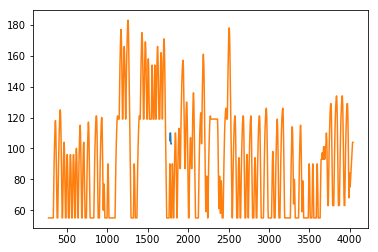

1804 1822
{1505: set([((8, 9, 10, 7), 'bottom')]), 1506: set([((8, 9, 10, 7), 'bottom')]), 1507: set([((8, 9, 10, 7), 'bottom')]), 1331: set([((8, 5, 6, 7), 'bottom')]), 1804: set([]), 1005: set([((8, 9, 10, 7), 'bottom')]), 1773: set([((8, 5, 6, 7), 'bottom')]), 946: set([((8, 5, 6, 7), 'right')]), 947: set([((8, 5, 6, 7), 'right')]), 948: set([((8, 9, 10, 7), 'top')]), 950: set([((5, 6), 'bottom')]), 951: set([((5, 6), 'bottom')]), 952: set([((5, 6), 'bottom')]), 953: set([((5, 6), 'bottom')]), 954: set([((5, 6), 'bottom')]), 955: set([((5, 6), 'bottom')]), 956: set([((5, 6), 'bottom')]), 957: set([((5, 6), 'bottom')]), 958: set([((5, 6), 'bottom')]), 959: set([((5, 6), 'bottom')])}


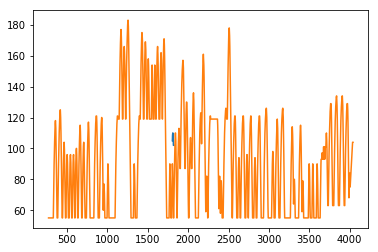

2218 2260
{1505: set([((8, 9, 10, 7), 'bottom')]), 1506: set([((8, 9, 10, 7), 'bottom')]), 1507: set([((8, 9, 10, 7), 'bottom')]), 1331: set([((8, 5, 6, 7), 'bottom')]), 2220: set([]), 1804: set([((8, 5, 6, 7), 'bottom')]), 1005: set([((8, 9, 10, 7), 'bottom')]), 1773: set([((8, 5, 6, 7), 'bottom')]), 946: set([((8, 5, 6, 7), 'right')]), 947: set([((8, 5, 6, 7), 'right')]), 948: set([((8, 9, 10, 7), 'top')]), 950: set([((5, 6), 'bottom')]), 951: set([((5, 6), 'bottom')]), 952: set([((5, 6), 'bottom')]), 953: set([((5, 6), 'bottom')]), 954: set([((5, 6), 'bottom')]), 955: set([((5, 6), 'bottom')]), 956: set([((5, 6), 'bottom')]), 957: set([((5, 6), 'bottom')]), 958: set([((5, 6), 'bottom')]), 959: set([((5, 6), 'bottom')])}
{1804: set([((8, 5, 6, 7), 'bottom')]), 1773: set([((8, 5, 6, 7), 'bottom')]), 947: set([((8, 5, 6, 7), 'right')]), 2220: set([((5, 6), 'bottom')]), 2221: set([]), 946: set([((8, 5, 6, 7), 'right')]), 1331: set([((8, 5, 6, 7), 'bottom')]), 948: set([((8, 9, 10, 7), '

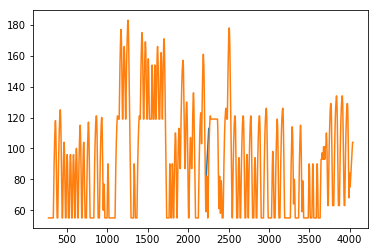

2100 2261
{1804: set([((8, 5, 6, 7), 'bottom')]), 1773: set([((8, 5, 6, 7), 'bottom')]), 947: set([((8, 5, 6, 7), 'right')]), 2230: set([((5, 6), 'bottom')]), 2226: set([((5, 6), 'bottom')]), 2216: set([]), 2220: set([((5, 6), 'bottom')]), 2221: set([((5, 6), 'bottom')]), 2222: set([((5, 6), 'bottom')]), 2223: set([((5, 6), 'bottom')]), 2224: set([((5, 6), 'bottom')]), 2225: set([((5, 6), 'bottom')]), 946: set([((8, 5, 6, 7), 'right')]), 1331: set([((8, 5, 6, 7), 'bottom')]), 948: set([((8, 9, 10, 7), 'top')]), 2229: set([((5, 6), 'bottom')]), 950: set([((5, 6), 'bottom')]), 951: set([((5, 6), 'bottom')]), 952: set([((5, 6), 'bottom')]), 953: set([((5, 6), 'bottom')]), 954: set([((5, 6), 'bottom')]), 955: set([((5, 6), 'bottom')]), 956: set([((5, 6), 'bottom')]), 957: set([((5, 6), 'bottom')]), 958: set([((5, 6), 'bottom')]), 959: set([((5, 6), 'bottom')]), 2227: set([((5, 6), 'bottom')]), 2231: set([((5, 6), 'bottom')]), 2232: set([((5, 6), 'bottom')]), 2259: set([((5, 6), 'bottom')])

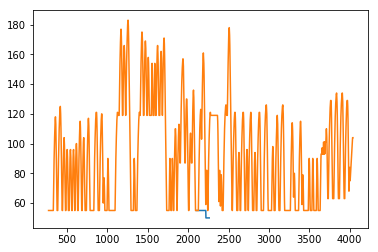

2380 2407
{1804: set([((8, 5, 6, 7), 'bottom')]), 1773: set([((8, 5, 6, 7), 'bottom')]), 947: set([((8, 5, 6, 7), 'right')]), 2230: set([((5, 6), 'bottom')]), 2226: set([((5, 6), 'bottom')]), 2216: set([((8, 5, 6, 7), 'right')]), 2217: set([((8, 5, 6, 7), 'top')]), 2218: set([((8, 9, 10, 7), 'top')]), 2220: set([((5, 6), 'bottom')]), 2221: set([((5, 6), 'bottom')]), 2222: set([((5, 6), 'bottom')]), 2223: set([((5, 6), 'bottom')]), 2224: set([((5, 6), 'bottom')]), 2225: set([((5, 6), 'bottom')]), 946: set([((8, 5, 6, 7), 'right')]), 1331: set([((8, 5, 6, 7), 'bottom')]), 948: set([((8, 9, 10, 7), 'top')]), 2229: set([((5, 6), 'bottom')]), 950: set([((5, 6), 'bottom')]), 951: set([((5, 6), 'bottom')]), 952: set([((5, 6), 'bottom')]), 953: set([((5, 6), 'bottom')]), 954: set([((5, 6), 'bottom')]), 955: set([((5, 6), 'bottom')]), 956: set([((5, 6), 'bottom')]), 957: set([((5, 6), 'bottom')]), 958: set([((5, 6), 'bottom')]), 959: set([((5, 6), 'bottom')]), 2227: set([((5, 6), 'bottom')]), 2

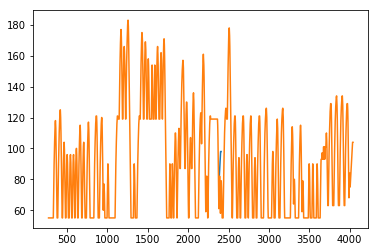

2226 2408
{2391: set([((5, 6), 'bottom')]), 1804: set([((8, 5, 6, 7), 'bottom')]), 1773: set([((8, 5, 6, 7), 'bottom')]), 947: set([((8, 5, 6, 7), 'right')]), 2230: set([((5, 6), 'bottom')]), 2226: set([((5, 6), 'bottom')]), 2216: set([((8, 5, 6, 7), 'right')]), 2217: set([((8, 5, 6, 7), 'top')]), 2218: set([((8, 9, 10, 7), 'top')]), 2220: set([((5, 6), 'bottom')]), 2221: set([((5, 6), 'bottom')]), 2222: set([((5, 6), 'bottom')]), 2223: set([((5, 6), 'bottom')]), 2224: set([((5, 6), 'bottom')]), 2225: set([((5, 6), 'bottom')]), 946: set([((8, 5, 6, 7), 'right')]), 1331: set([((8, 5, 6, 7), 'bottom')]), 948: set([((8, 9, 10, 7), 'top')]), 2229: set([((5, 6), 'bottom')]), 950: set([((5, 6), 'bottom')]), 951: set([((5, 6), 'bottom')]), 952: set([((5, 6), 'bottom')]), 953: set([((5, 6), 'bottom')]), 954: set([((5, 6), 'bottom')]), 955: set([((5, 6), 'bottom')]), 956: set([((5, 6), 'bottom')]), 957: set([((5, 6), 'bottom')]), 958: set([((5, 6), 'bottom')]), 959: set([((5, 6), 'bottom')]), 2

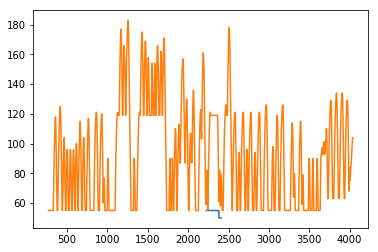

2400 2428
{2391: set([((5, 6), 'bottom')]), 1804: set([((8, 5, 6, 7), 'bottom')]), 1773: set([((8, 5, 6, 7), 'bottom')]), 947: set([((8, 5, 6, 7), 'right')]), 2230: set([((5, 6), 'bottom')]), 2226: set([((5, 6), 'bottom')]), 2216: set([((8, 5, 6, 7), 'right')]), 2217: set([((8, 5, 6, 7), 'top')]), 2218: set([((8, 9, 10, 7), 'top')]), 2220: set([((5, 6), 'bottom')]), 2221: set([((5, 6), 'bottom')]), 2222: set([((5, 6), 'bottom')]), 2223: set([((5, 6), 'bottom')]), 2224: set([((5, 6), 'bottom')]), 2225: set([((5, 6), 'bottom')]), 946: set([((8, 5, 6, 7), 'right')]), 1331: set([((8, 5, 6, 7), 'bottom')]), 948: set([((8, 9, 10, 7), 'top')]), 2229: set([((5, 6), 'bottom')]), 950: set([((5, 6), 'bottom')]), 951: set([((5, 6), 'bottom')]), 952: set([((5, 6), 'bottom')]), 953: set([((5, 6), 'bottom')]), 954: set([((5, 6), 'bottom')]), 955: set([((5, 6), 'bottom')]), 956: set([((5, 6), 'bottom')]), 957: set([((5, 6), 'bottom')]), 958: set([((5, 6), 'bottom')]), 959: set([((5, 6), 'bottom')]), 2

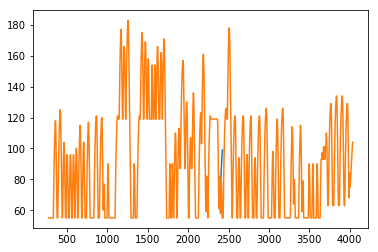

2245 2429
{2411: set([((5, 6), 'bottom')]), 2391: set([((5, 6), 'bottom')]), 1804: set([((8, 5, 6, 7), 'bottom')]), 1773: set([((8, 5, 6, 7), 'bottom')]), 947: set([((8, 5, 6, 7), 'right')]), 2230: set([((5, 6), 'bottom')]), 2226: set([((5, 6), 'bottom')]), 2216: set([((8, 5, 6, 7), 'right')]), 2217: set([((8, 5, 6, 7), 'top')]), 2218: set([((8, 9, 10, 7), 'top')]), 2220: set([((5, 6), 'bottom')]), 2221: set([((5, 6), 'bottom')]), 2222: set([((5, 6), 'bottom')]), 2223: set([((5, 6), 'bottom')]), 2224: set([((5, 6), 'bottom')]), 2225: set([((5, 6), 'bottom')]), 946: set([((8, 5, 6, 7), 'right')]), 1331: set([((8, 5, 6, 7), 'bottom')]), 948: set([((8, 9, 10, 7), 'top')]), 2229: set([((5, 6), 'bottom')]), 950: set([((5, 6), 'bottom')]), 951: set([((5, 6), 'bottom')]), 952: set([((5, 6), 'bottom')]), 953: set([((5, 6), 'bottom')]), 954: set([((5, 6), 'bottom')]), 955: set([((5, 6), 'bottom')]), 956: set([((5, 6), 'bottom')]), 957: set([((5, 6), 'bottom')]), 958: set([((5, 6), 'bottom')]), 

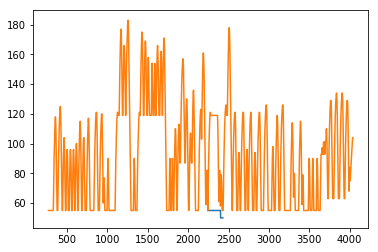

3306 3352
{2411: set([((5, 6), 'bottom')]), 2391: set([((5, 6), 'bottom')]), 1804: set([((8, 5, 6, 7), 'bottom')]), 1773: set([((8, 5, 6, 7), 'bottom')]), 947: set([((8, 5, 6, 7), 'right')]), 2230: set([((5, 6), 'bottom')]), 2226: set([((5, 6), 'bottom')]), 2216: set([((8, 5, 6, 7), 'right')]), 2217: set([((8, 5, 6, 7), 'top')]), 2218: set([((8, 9, 10, 7), 'top')]), 2220: set([((5, 6), 'bottom')]), 2221: set([((5, 6), 'bottom')]), 2222: set([((5, 6), 'bottom')]), 2223: set([((5, 6), 'bottom')]), 2224: set([((5, 6), 'bottom')]), 2225: set([((5, 6), 'bottom')]), 946: set([((8, 5, 6, 7), 'right')]), 1331: set([((8, 5, 6, 7), 'bottom')]), 948: set([((8, 9, 10, 7), 'top')]), 2229: set([((5, 6), 'bottom')]), 950: set([((5, 6), 'bottom')]), 951: set([((5, 6), 'bottom')]), 952: set([((5, 6), 'bottom')]), 953: set([((5, 6), 'bottom')]), 954: set([((5, 6), 'bottom')]), 955: set([((5, 6), 'bottom')]), 956: set([((5, 6), 'bottom')]), 957: set([((5, 6), 'bottom')]), 958: set([((5, 6), 'bottom')]), 

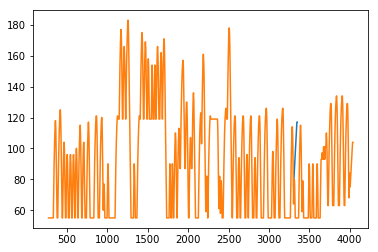

3157 3353
{2411: set([((5, 6), 'bottom')]), 3315: set([((5, 6), 'bottom')]), 3308: set([((5, 6), 'bottom')]), 2391: set([((5, 6), 'bottom')]), 1804: set([((8, 5, 6, 7), 'bottom')]), 1773: set([((8, 5, 6, 7), 'bottom')]), 3309: set([((5, 6), 'bottom')]), 947: set([((8, 5, 6, 7), 'right')]), 2230: set([((5, 6), 'bottom')]), 2226: set([((5, 6), 'bottom')]), 2216: set([((8, 5, 6, 7), 'right')]), 2217: set([((8, 5, 6, 7), 'top')]), 2218: set([((8, 9, 10, 7), 'top')]), 3305: set([]), 2220: set([((5, 6), 'bottom')]), 2221: set([((5, 6), 'bottom')]), 2222: set([((5, 6), 'bottom')]), 2223: set([((5, 6), 'bottom')]), 2224: set([((5, 6), 'bottom')]), 2225: set([((5, 6), 'bottom')]), 946: set([((8, 5, 6, 7), 'right')]), 1331: set([((8, 5, 6, 7), 'bottom')]), 948: set([((8, 9, 10, 7), 'top')]), 2229: set([((5, 6), 'bottom')]), 950: set([((5, 6), 'bottom')]), 951: set([((5, 6), 'bottom')]), 952: set([((5, 6), 'bottom')]), 953: set([((5, 6), 'bottom')]), 954: set([((5, 6), 'bottom')]), 955: set([((5,

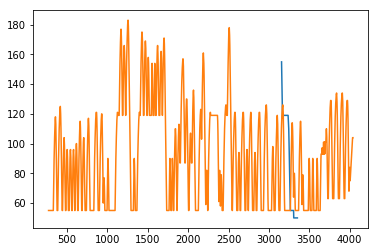

3410 3436
{2216: set([((8, 5, 6, 7), 'right')]), 2217: set([((8, 5, 6, 7), 'top')]), 2218: set([((8, 9, 10, 7), 'top')]), 2220: set([((5, 6), 'bottom')]), 2221: set([((5, 6), 'bottom')]), 2222: set([((5, 6), 'bottom')]), 2223: set([((5, 6), 'bottom')]), 2224: set([((5, 6), 'bottom')]), 2225: set([((5, 6), 'bottom')]), 2226: set([((5, 6), 'bottom')]), 2227: set([((5, 6), 'bottom')]), 2228: set([((5, 6), 'bottom')]), 2229: set([((5, 6), 'bottom')]), 2230: set([((5, 6), 'bottom')]), 2231: set([((5, 6), 'bottom')]), 2232: set([((5, 6), 'bottom')]), 2233: set([((5, 6), 'bottom')]), 2259: set([((5, 6), 'bottom')]), 2260: set([((5, 6), 'bottom')]), 3305: set([((8, 5, 6, 7), 'right')]), 3306: set([((8, 9, 10, 7), 'right')]), 3307: set([((5, 6), 'bottom')]), 3308: set([((5, 6), 'bottom')]), 1773: set([((8, 5, 6, 7), 'bottom')]), 3310: set([((5, 6), 'bottom')]), 3311: set([((5, 6), 'bottom')]), 3312: set([((5, 6), 'bottom')]), 3313: set([((5, 6), 'bottom')]), 3314: set([((5, 6), 'bottom')]), 331

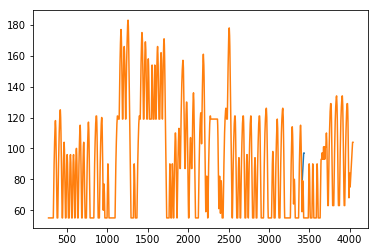

3189 3437
{3414: set([((5, 6), 'bottom')]), 3415: set([((5, 6), 'bottom')]), 3416: set([((5, 6), 'bottom')]), 3417: set([((5, 6), 'bottom')]), 3421: set([((5, 6), 'bottom')]), 3422: set([((5, 6), 'bottom')]), 2216: set([((8, 5, 6, 7), 'right')]), 2217: set([((8, 5, 6, 7), 'top')]), 2218: set([((8, 9, 10, 7), 'top')]), 2220: set([((5, 6), 'bottom')]), 2221: set([((5, 6), 'bottom')]), 2222: set([((5, 6), 'bottom')]), 2223: set([((5, 6), 'bottom')]), 2224: set([((5, 6), 'bottom')]), 2225: set([((5, 6), 'bottom')]), 2226: set([((5, 6), 'bottom')]), 2227: set([((5, 6), 'bottom')]), 2228: set([((5, 6), 'bottom')]), 2229: set([((5, 6), 'bottom')]), 2230: set([((5, 6), 'bottom')]), 2231: set([((5, 6), 'bottom')]), 2232: set([((5, 6), 'bottom')]), 2233: set([((5, 6), 'bottom')]), 2259: set([((5, 6), 'bottom')]), 2260: set([((5, 6), 'bottom')]), 3305: set([((8, 5, 6, 7), 'right')]), 3306: set([((8, 9, 10, 7), 'right')]), 3307: set([((5, 6), 'bottom')]), 3308: set([((5, 6), 'bottom')]), 1773: set

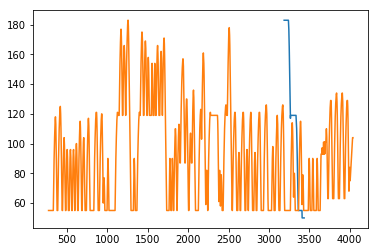

3498 3516
{3414: set([((5, 6), 'bottom')]), 3415: set([((5, 6), 'bottom')]), 3410: set([((8, 9, 10, 7), 'right')]), 3416: set([((5, 6), 'bottom')]), 3417: set([((5, 6), 'bottom')]), 3421: set([((5, 6), 'bottom')]), 3422: set([((5, 6), 'bottom')]), 3429: set([((8, 7), 'right')]), 3430: set([((8, 7), 'right')]), 3431: set([((8, 7), 'right')]), 3432: set([((5, 6), 'right')]), 3433: set([((5, 6), 'right')]), 3434: set([((5, 6), 'right')]), 3435: set([((5, 6), 'bottom')]), 3436: set([((5, 6), 'bottom')]), 2216: set([((8, 5, 6, 7), 'right')]), 2217: set([((8, 5, 6, 7), 'top')]), 2218: set([((8, 9, 10, 7), 'top')]), 2220: set([((5, 6), 'bottom')]), 2221: set([((5, 6), 'bottom')]), 2222: set([((5, 6), 'bottom')]), 2223: set([((5, 6), 'bottom')]), 2224: set([((5, 6), 'bottom')]), 2225: set([((5, 6), 'bottom')]), 2226: set([((5, 6), 'bottom')]), 2227: set([((5, 6), 'bottom')]), 2228: set([((5, 6), 'bottom')]), 2229: set([((5, 6), 'bottom')]), 2230: set([((5, 6), 'bottom')]), 2231: set([((5, 6), 

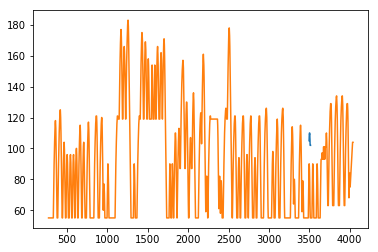

3597 3615
{3414: set([((5, 6), 'bottom')]), 3415: set([((5, 6), 'bottom')]), 3410: set([((8, 9, 10, 7), 'right')]), 3597: set([]), 3416: set([((5, 6), 'bottom')]), 3417: set([((5, 6), 'bottom')]), 3421: set([((5, 6), 'bottom')]), 3422: set([((5, 6), 'bottom')]), 3429: set([((8, 7), 'right')]), 3430: set([((8, 7), 'right')]), 3431: set([((8, 7), 'right')]), 3432: set([((5, 6), 'right')]), 3433: set([((5, 6), 'right')]), 3434: set([((5, 6), 'right')]), 3435: set([((5, 6), 'bottom')]), 3436: set([((5, 6), 'bottom')]), 2216: set([((8, 5, 6, 7), 'right')]), 2217: set([((8, 5, 6, 7), 'top')]), 2218: set([((8, 9, 10, 7), 'top')]), 2220: set([((5, 6), 'bottom')]), 2221: set([((5, 6), 'bottom')]), 2222: set([((5, 6), 'bottom')]), 2223: set([((5, 6), 'bottom')]), 2224: set([((5, 6), 'bottom')]), 2225: set([((5, 6), 'bottom')]), 2226: set([((5, 6), 'bottom')]), 2227: set([((5, 6), 'bottom')]), 2228: set([((5, 6), 'bottom')]), 2229: set([((5, 6), 'bottom')]), 2230: set([((5, 6), 'bottom')]), 2231:

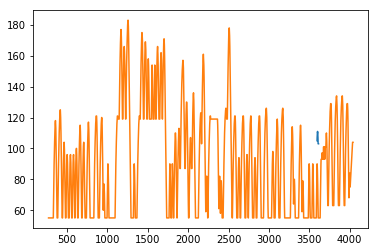

3543 3651
{3414: set([((5, 6), 'bottom')]), 3415: set([((5, 6), 'bottom')]), 3410: set([((8, 9, 10, 7), 'right')]), 3597: set([((9, 10, 11, 12), 'bottom')]), 3416: set([((5, 6), 'bottom')]), 3417: set([((5, 6), 'bottom')]), 3421: set([((5, 6), 'bottom')]), 3422: set([((5, 6), 'bottom')]), 3429: set([((8, 7), 'right')]), 3430: set([((8, 7), 'right')]), 3431: set([((8, 7), 'right')]), 3432: set([((5, 6), 'right')]), 3433: set([((5, 6), 'right')]), 3434: set([((5, 6), 'right')]), 3435: set([((5, 6), 'bottom')]), 3436: set([((5, 6), 'bottom')]), 2216: set([((8, 5, 6, 7), 'right')]), 2217: set([((8, 5, 6, 7), 'top')]), 2218: set([((8, 9, 10, 7), 'top')]), 2220: set([((5, 6), 'bottom')]), 2221: set([((5, 6), 'bottom')]), 2222: set([((5, 6), 'bottom')]), 2223: set([((5, 6), 'bottom')]), 2224: set([((5, 6), 'bottom')]), 2225: set([((5, 6), 'bottom')]), 2226: set([((5, 6), 'bottom')]), 2227: set([((5, 6), 'bottom')]), 2228: set([((5, 6), 'bottom')]), 2229: set([((5, 6), 'bottom')]), 2230: set([

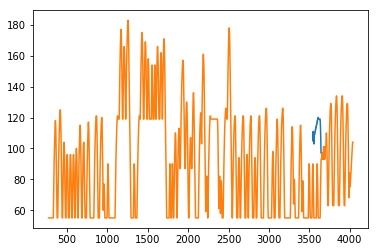

3646 3698


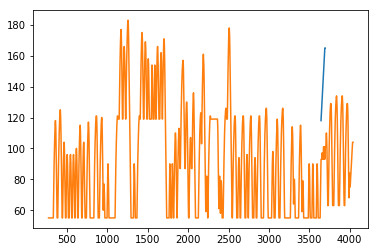

3992 4020
{3414: set([((5, 6), 'bottom')]), 3415: set([((5, 6), 'bottom')]), 3410: set([((8, 9, 10, 7), 'right')]), 3597: set([((9, 10, 11, 12), 'bottom')]), 3416: set([((5, 6), 'bottom')]), 3417: set([((5, 6), 'bottom')]), 3421: set([((5, 6), 'bottom')]), 3422: set([((5, 6), 'bottom')]), 3645: set([((8, 5, 6, 7), 'bottom')]), 3646: set([((8, 5, 6, 7), 'bottom')]), 3647: set([((8, 5, 6, 7), 'bottom')]), 3648: set([((8, 5, 6, 7), 'bottom')]), 3649: set([((8, 5, 6, 7), 'bottom')]), 3650: set([((8, 5, 6, 7), 'bottom')]), 3651: set([((8, 5, 6, 7), 'bottom')]), 3429: set([((8, 7), 'right')]), 3430: set([((8, 7), 'right')]), 3431: set([((8, 7), 'right')]), 3432: set([((5, 6), 'right')]), 3433: set([((5, 6), 'right')]), 3434: set([((5, 6), 'right')]), 3435: set([((5, 6), 'bottom')]), 3436: set([((5, 6), 'bottom')]), 2216: set([((8, 5, 6, 7), 'right')]), 2217: set([((8, 5, 6, 7), 'top')]), 2218: set([((8, 9, 10, 7), 'top')]), 2220: set([((5, 6), 'bottom')]), 2221: set([((5, 6), 'bottom')]), 22

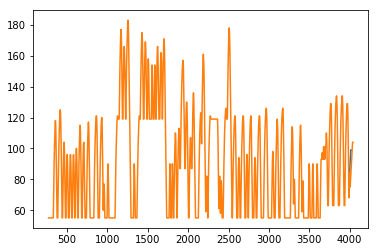

3841 4021
{3414: set([((5, 6), 'bottom')]), 3415: set([((5, 6), 'bottom')]), 3410: set([((8, 9, 10, 7), 'right')]), 3597: set([((9, 10, 11, 12), 'bottom')]), 3416: set([((5, 6), 'bottom')]), 3417: set([((5, 6), 'bottom')]), 3421: set([((5, 6), 'bottom')]), 3422: set([((5, 6), 'bottom')]), 3645: set([((8, 5, 6, 7), 'bottom')]), 3646: set([((8, 5, 6, 7), 'bottom')]), 3647: set([((8, 5, 6, 7), 'bottom')]), 3648: set([((8, 5, 6, 7), 'bottom')]), 3649: set([((8, 5, 6, 7), 'bottom')]), 3650: set([((8, 5, 6, 7), 'bottom')]), 3651: set([((8, 5, 6, 7), 'bottom')]), 3429: set([((8, 7), 'right')]), 3430: set([((8, 7), 'right')]), 3431: set([((8, 7), 'right')]), 3432: set([((5, 6), 'right')]), 3433: set([((5, 6), 'right')]), 3434: set([((5, 6), 'right')]), 3435: set([((5, 6), 'bottom')]), 3436: set([((5, 6), 'bottom')]), 2216: set([((8, 5, 6, 7), 'right')]), 2217: set([((8, 5, 6, 7), 'top')]), 2218: set([((8, 9, 10, 7), 'top')]), 2220: set([((5, 6), 'bottom')]), 2221: set([((5, 6), 'bottom')]), 22

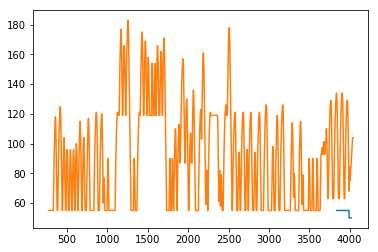

4012 4030
{3414: set([((5, 6), 'bottom')]), 3415: set([((5, 6), 'bottom')]), 3410: set([((8, 9, 10, 7), 'right')]), 3597: set([((9, 10, 11, 12), 'bottom')]), 3416: set([((5, 6), 'bottom')]), 3417: set([((5, 6), 'bottom')]), 3421: set([((5, 6), 'bottom')]), 3422: set([((5, 6), 'bottom')]), 3645: set([((8, 5, 6, 7), 'bottom')]), 3646: set([((8, 5, 6, 7), 'bottom')]), 3647: set([((8, 5, 6, 7), 'bottom')]), 3648: set([((8, 5, 6, 7), 'bottom')]), 3649: set([((8, 5, 6, 7), 'bottom')]), 3650: set([((8, 5, 6, 7), 'bottom')]), 3651: set([((8, 5, 6, 7), 'bottom')]), 4025: set([]), 3429: set([((8, 7), 'right')]), 3430: set([((8, 7), 'right')]), 3431: set([((8, 7), 'right')]), 3432: set([((5, 6), 'right')]), 3433: set([((5, 6), 'right')]), 3434: set([((5, 6), 'right')]), 3435: set([((5, 6), 'bottom')]), 3436: set([((5, 6), 'bottom')]), 2216: set([((8, 5, 6, 7), 'right')]), 2217: set([((8, 5, 6, 7), 'top')]), 2218: set([((8, 9, 10, 7), 'top')]), 2220: set([((5, 6), 'bottom')]), 2221: set([((5, 6), 

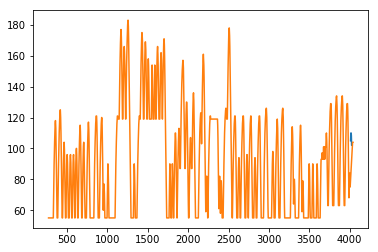

3856 4041
{3414: set([((5, 6), 'bottom')]), 3415: set([((5, 6), 'bottom')]), 3410: set([((8, 9, 10, 7), 'right')]), 3597: set([((9, 10, 11, 12), 'bottom')]), 3416: set([((5, 6), 'bottom')]), 3417: set([((5, 6), 'bottom')]), 3421: set([((5, 6), 'bottom')]), 3422: set([((5, 6), 'bottom')]), 3645: set([((8, 5, 6, 7), 'bottom')]), 3646: set([((8, 5, 6, 7), 'bottom')]), 3647: set([((8, 5, 6, 7), 'bottom')]), 3648: set([((8, 5, 6, 7), 'bottom')]), 3649: set([((8, 5, 6, 7), 'bottom')]), 3650: set([((8, 5, 6, 7), 'bottom')]), 3651: set([((8, 5, 6, 7), 'bottom')]), 4025: set([((16, 17, 18, 15), 'bottom')]), 4026: set([((16, 17, 18, 15), 'bottom')]), 3429: set([((8, 7), 'right')]), 4027: set([((16, 17, 18, 15), 'bottom')]), 3430: set([((8, 7), 'right')]), 4028: set([((16, 17, 18, 15), 'bottom')]), 3431: set([((8, 7), 'right')]), 4029: set([((16, 17, 18, 15), 'bottom')]), 3432: set([((5, 6), 'right')]), 4030: set([((16, 17, 18, 15), 'bottom')]), 3433: set([((5, 6), 'right')]), 3434: set([((5, 6),

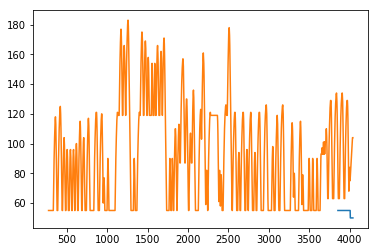

4012 4041


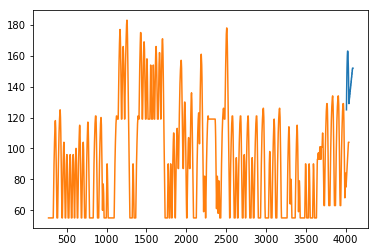

4008 4041
{3414: set([((5, 6), 'bottom')]), 3415: set([((5, 6), 'bottom')]), 3410: set([((8, 9, 10, 7), 'right')]), 3597: set([((9, 10, 11, 12), 'bottom')]), 3416: set([((5, 6), 'bottom')]), 3417: set([((5, 6), 'bottom')]), 3421: set([((5, 6), 'bottom')]), 3422: set([((5, 6), 'bottom')]), 3645: set([((8, 5, 6, 7), 'bottom')]), 3646: set([((8, 5, 6, 7), 'bottom')]), 3647: set([((8, 5, 6, 7), 'bottom')]), 3648: set([((8, 5, 6, 7), 'bottom')]), 3649: set([((8, 5, 6, 7), 'bottom')]), 3650: set([((8, 5, 6, 7), 'bottom')]), 3651: set([((8, 5, 6, 7), 'bottom')]), 4025: set([((16, 17, 18, 15), 'bottom')]), 4026: set([((16, 17, 18, 15), 'bottom')]), 3429: set([((8, 7), 'right')]), 4027: set([((16, 17, 18, 15), 'bottom')]), 3430: set([((8, 7), 'right')]), 4028: set([((16, 17, 18, 15), 'bottom')]), 3431: set([((8, 7), 'right')]), 4029: set([((16, 17, 18, 15), 'bottom')]), 3432: set([((5, 6), 'right')]), 4030: set([((16, 17, 18, 15), 'bottom')]), 3433: set([((5, 6), 'right')]), 3434: set([((5, 6),

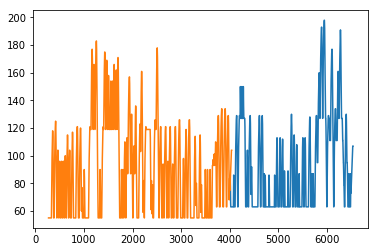

In [4]:
import math

sprite_collisions = {}
for track in tracks:
    trackID = track[0]
    
    if trackID != 'track2':
        trackDict = track[1]
        trackDat = []
        isGood = False
        for sourceT in tile_collisions:
            if sourceT in trackDict:
                isGood = True
                break
        if isGood:
            overlapping = []
            for t in sorted(trackDict):
                trackDat.append([t] + list(trackDict[t][1]))
                if t in exemplarTrack[:,0]:
                    overlapping.append(t)
            
            
            trackDat = np.array(trackDat)
            
            startOverlapping = overlapping[0]
            endOverlapping = overlapping[-1]
            print startOverlapping,endOverlapping
            
            for pt in trackDat:
                if pt[0] > endOverlapping:
                    break
                    
                if pt[0] >= startOverlapping:
                    exemplarPt = exemplarTrack[exemplarTrack[:,0] == pt[0],: ][0]
                    if (pt[3] < exemplarPt[4] and
                        pt[4] > exemplarPt[3] and
                        pt[5] < exemplarPt[6] and
                        pt[6] > exemplarPt[5]):
                        diff = pt[1:3]-exemplarPt[1:3]
                        angle = math.atan2(diff[1],diff[0])*180/3.14159
                        
                        if angle < 45.0 or angle > 315.0:
                            direction = 'bottom'
                        elif angle < 135.0:
                            direction = 'right'
                        elif angle < 225.0:
                            direction = 'top'
                        else:
                            direction = 'left'
                        if pt[0] not in sprite_collisions:
                            sprite_collisions[pt[0]] = set()
                        print sprite_collisions
                        sprite_collisions[pt[0]].add(  (tuple(trackDict[pt[0]][2]), direction))
            
            plt.plot(trackDat[:,0],256-trackDat[:,2])
            plt.plot(exemplarTrack[:,0],256-exemplarTrack[:,2])
            plt.show()
            
            

In [5]:
all_collisions = {}
for t in sprite_collisions:
    all_collisions[t] = sprite_collisions[t]
    
    
print all_collisions
for t in tile_collisions:
    for coll in tile_collisions[t]:
        if t not in all_collisions:
            all_collisions[t] = set()
        all_collisions[t].add(((coll[0],coll[1],'tile'),coll[2]))

{2390: set([((5, 6), 'bottom')]), 2391: set([((5, 6), 'bottom')]), 3597: set([((9, 10, 11, 12), 'bottom')]), 2392: set([((9, 10), 'bottom')]), 2393: set([((5, 6), 'bottom')]), 946: set([((8, 5, 6, 7), 'right')]), 2397: set([((9, 10, 11, 12), 'right')]), 947: set([((8, 5, 6, 7), 'right')]), 2398: set([((8, 5, 6, 7), 'right')]), 948: set([((8, 9, 10, 7), 'top')]), 3645: set([((8, 5, 6, 7), 'bottom')]), 3646: set([((8, 5, 6, 7), 'bottom')]), 3647: set([((8, 5, 6, 7), 'bottom')]), 3648: set([((8, 5, 6, 7), 'bottom')]), 3649: set([((8, 5, 6, 7), 'bottom')]), 3650: set([((8, 5, 6, 7), 'bottom')]), 3651: set([((8, 5, 6, 7), 'bottom')]), 953: set([((5, 6), 'bottom')]), 954: set([((5, 6), 'bottom')]), 2405: set([((5, 6), 'bottom')]), 955: set([((5, 6), 'bottom')]), 2406: set([((5, 6), 'bottom')]), 956: set([((5, 6), 'bottom')]), 2407: set([((5, 6), 'bottom')]), 957: set([((5, 6), 'bottom')]), 2408: set([((5, 6), 'bottom')]), 958: set([((5, 6), 'bottom')]), 2409: set([((5, 6), 'bottom')]), 2410:

In [6]:
pickle.dump(all_collisions,open('mario_collisions.pkl','wb'))
